In [1]:
library(foreign) # library for importing sav file (SPSS) into R.

In [2]:
dataset = read.spss("Bodyfat.sav", to.data.frame=TRUE)

In [3]:
str(dataset)

'data.frame':	252 obs. of  18 variables:
 $ Case      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PctBodyFat: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ Density   : num  1.07 1.09 1.04 1.08 1.03 ...
 $ Age       : num  23 22 22 26 24 24 26 25 25 23 ...
 $ Weight    : num  154 173 154 185 184 ...
 $ Height    : num  67.8 72.2 66.2 72.2 71.2 ...
 $ Adioposity: num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ FatFreeWt : num  135 161 116 165 133 ...
 $ Neck      : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ Chest     : num  93.1 93.6 95.8 101.8 97.3 ...
 $ Abdomen   : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ Hip       : num  94.5 98.7 99.2 101.2 101.9 ...
 $ Thigh     : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ Knee      : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ Ankle     : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ Biceps    : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ For

In [4]:
# variables we wish to look at 
variables <- c("Age", "Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")

In [5]:
fitted_model <- lm(PctBodyFat ~ Age, dataset)

In [6]:
anova(fitted_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1493.30,1493.30042,23.20852,2.522101e-06
Residuals,250,16085.69,64.34276,NA,NA


In [7]:
# p-value shows that age definitely has a correlation with % bodyfat

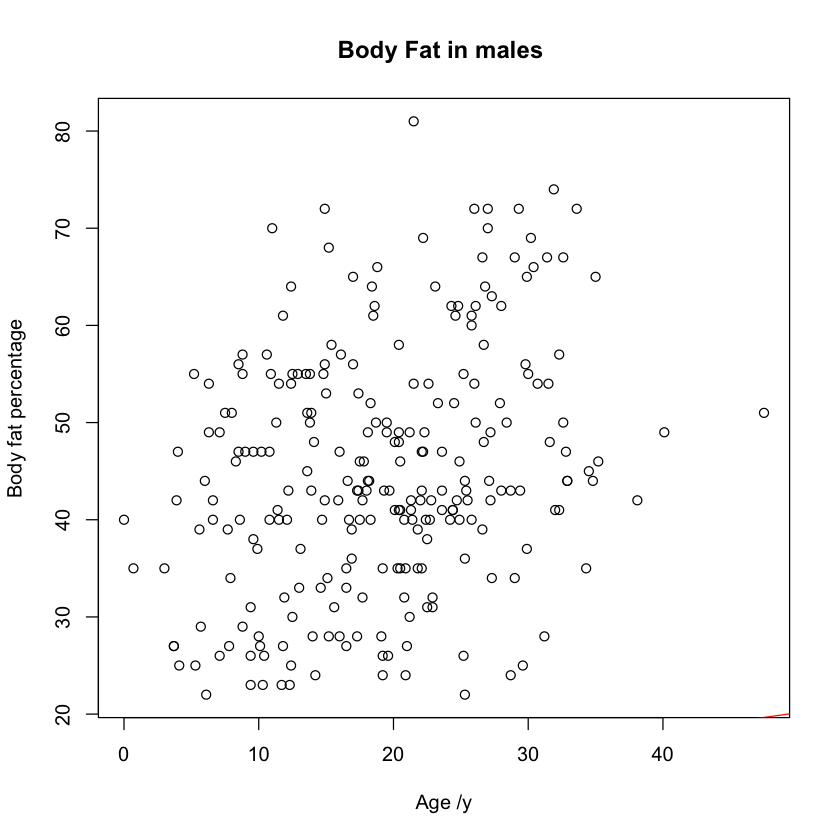

In [8]:
plot(dataset$PctBodyFat, dataset$Age, main="Body Fat in males ", xlab="Age /y", ylab='Body fat percentage')
abline(fitted_model, col='red')

In [9]:
# Weight

In [10]:
fitted_model_weight <- lm(PctBodyFat ~ Weight, dataset)

In [11]:
anova(fitted_model_weight)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Weight,1,6593.016,6593.01614,150.0326,2.473116e-27
Residuals,250,10985.974,43.94389,NA,NA


In [12]:
# p-value shows that weight definitely has a correlation with % bodyfat

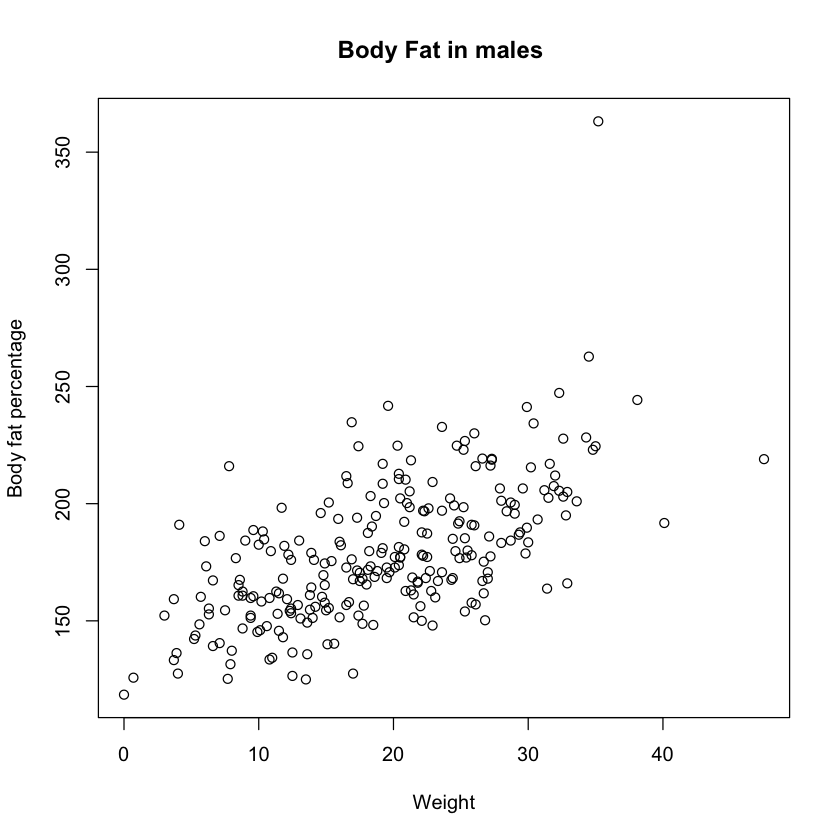

In [13]:
plot(dataset$PctBodyFat, dataset$Weight, main="Body Fat in males ", xlab="Weight", ylab='Body fat percentage')
abline(fitted_model_weight, col='red')

In [14]:
# Height

In [15]:
fitted_model_height <- lm(PctBodyFat ~ Height, dataset)

In [16]:
anova(fitted_model_height)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Height,1,11.24042,11.24042,0.1599582,0.6895365
Residuals,250,17567.74942,70.27100,NA,NA


In [ ]:
# p-value shows that height does not have a significant correlation with % body fat

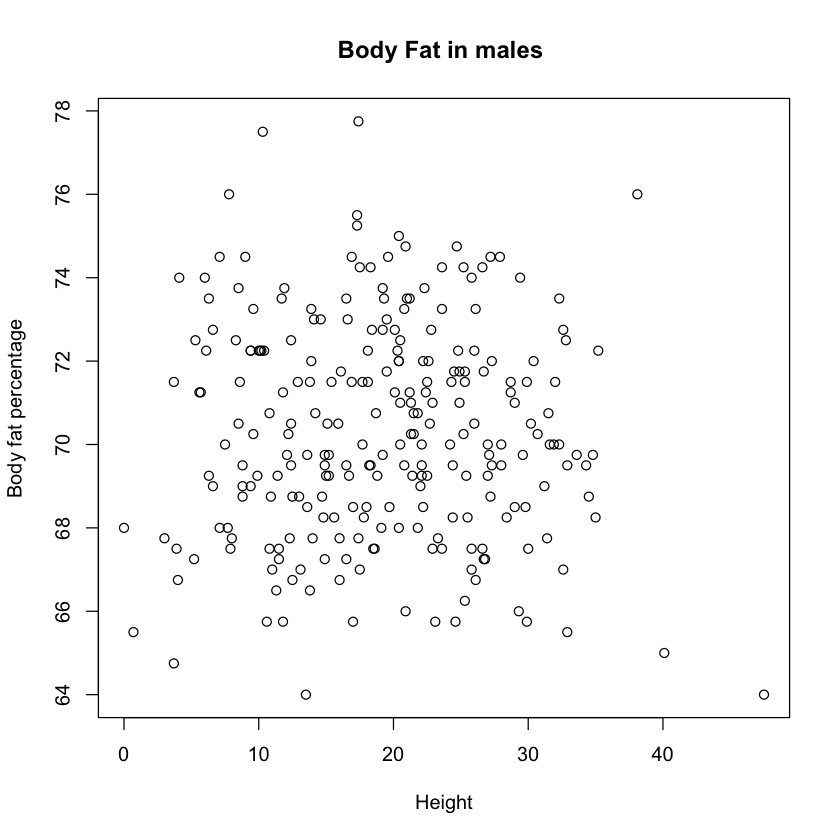

In [17]:
plot(dataset$PctBodyFat, dataset$Height, main="Body Fat in males ", xlab="Height", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [ ]:
# Neck

In [18]:
fitted_model_neck <- lm(PctBodyFat ~ Neck, dataset)

In [19]:
anova(fitted_model_neck)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Neck,1,4230.918,4230.91772,79.24211,1.147139e-16
Residuals,250,13348.072,53.39229,NA,NA


In [30]:
# The p-value shows there is a high correlation between Neck and % body fat

In [ ]:
#TODO: check the different importances
# run a multiple linear regression and then remove the insignificant ones one by one, 
# re running the analysis after each removal to check for whether they interract with other terms and need to be kept

In [31]:
# Look at how to automatically test for significance levels to then look at important variables

In [32]:
anova_results <- anova(fitted_model_neck)
str(anova_results)
anova_results$"Pr(>F)">0.001

Classes ‘anova’ and 'data.frame':	2 obs. of  5 variables:
 $ Df     : int  1 250
 $ Sum Sq : num  4231 13348
 $ Mean Sq: num  4230.9 53.4
 $ F value: num  79.2 NA
 $ Pr(>F) : num  1.15e-16 NA
 - attr(*, "heading")= chr  "Analysis of Variance Table\n" "Response: PctBodyFat"


[1] FALSE    NA

In [33]:
# Automated p-value testing for fitted models to get significance values

In [34]:
results = c()

In [35]:
for variable in variables {
    fitted_model <- lm(PctBodyFat ~ variable, dataset)
    anova_results <- anova(fitted_model)
    results.append(anova_results$"Pr(>F)">0.001) # statistical significance
}

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: for variable
        ^


In [ ]:
results